# Dataset

eigenvector	pagerank	clustering	triangles	degree	degree_centrality	average_neighbor_degree	node_clique_number	number_of_cliques	nb_of_nodes	nb_of_edges	diameter	assortativity	percolation_limit


there are columns of bgp graph feature data. nb_of_edges and nb_of_nodes and  average_neighbor_degree is high. 

In [12]:
from BML.data import Dataset
from BML import utils

#################
# Data collection

folder = "dataset/"
dataset = Dataset(folder)

dataset.setParams({
    "PrimingPeriod": 10*60, # 10 hours of priming data
    "IpVersion": [4], # only IPv4 routes
    "Collectors": ["rrc06"], # rrc06: at Otemachi, Japan 
})

dataset.setPeriodsOfInterests([
    {
    "name": "GoogleLeak",
    "label": "anomaly",
    "start_time": utils.getTimestamp(2017, 8, 25, 3, 0, 0),  # August 25, 2017, 3:00 UTC
    "end_time": utils.getTimestamp(2017, 8, 25, 4, 0, 0)  # August 25, 2017, 4:00 UTC
    }
])


# run the data collection
utils.runJobs(dataset.getJobs(), folder+"collect_jobs") 


################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/collect_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 5m 47s


# Statistical features extraction

In [56]:
from BML.transform import DatasetTransformation

# features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "Features")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/transform_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 1s


In [59]:
import pandas as pd 
data = pd.read_json(folder+"anomaly/GoogleLeak/transform/Features/Features_1.json")
data
# data.plot(figsize=(10,10))

,nb_A,nb_W,nb_implicit_W,nb_dup_A,nb_dup_W,nb_A_prefix,nb_W_prefix,max_A_prefix,avg_A_prefix,max_A_AS,...,editdist_11,editdist_12,editdist_13,editdist_14,editdist_15,editdist_16,editdist_17,nb_tolonger,nb_toshorter,avg_interarrival
0,677,75,520,70,0,260,51,14,3,46,...,0,0,0,0,0,0,0,231,289,1113
1,387,64,294,44,0,126,40,11,3,54,...,0,0,0,0,0,0,0,103,191,1054
2,460,58,357,50,0,162,42,12,3,58,...,0,0,0,0,0,0,0,109,248,1135
3,527,44,291,90,0,198,36,9,3,101,...,0,0,0,0,0,0,0,85,206,1160
4,676,34,501,124,0,259,24,20,3,108,...,0,0,0,0,0,0,0,146,355,1054
5,395,24,201,132,0,123,17,10,3,66,...,0,0,0,0,0,0,0,76,125,1054
6,451,24,306,74,0,137,18,18,3,72,...,0,0,0,0,0,0,0,124,182,1073
7,577,47,400,60,0,191,36,13,3,67,...,1,0,0,0,0,0,0,195,205,1093
8,307,23,221,24,0,132,21,15,2,36,...,0,0,0,0,0,0,0,99,122,1204
9,732,30,593,57,0,229,18,11,3,75,...,0,0,0,0,0,0,0,244,349,1283


<Axes: >

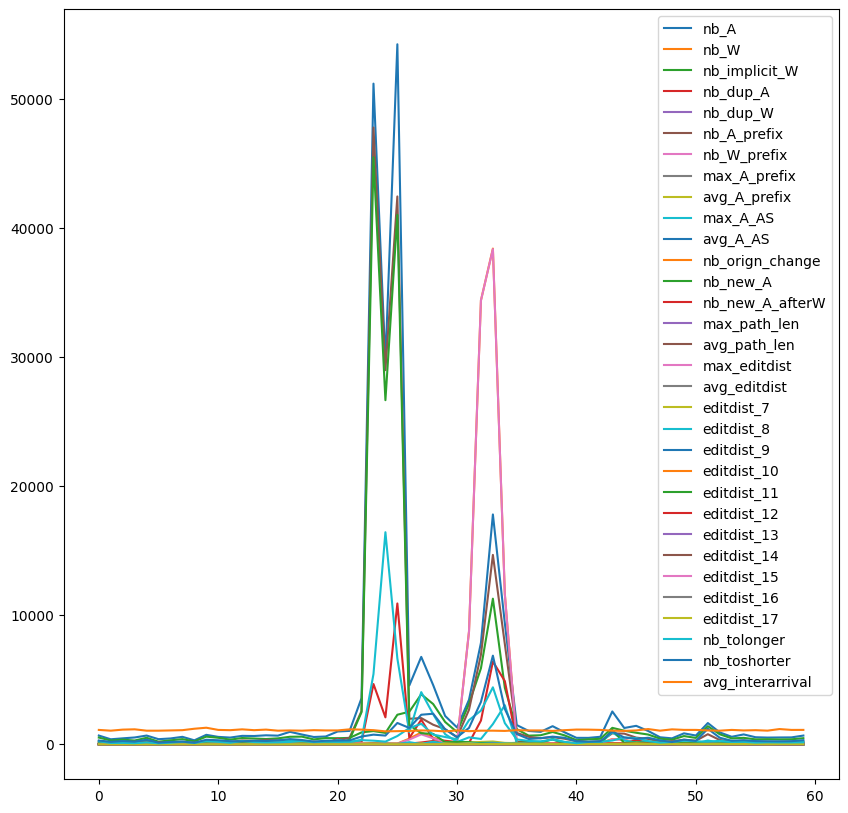

In [55]:
data.plot(figsize=(10,10))

# Graph features extraction

In [60]:
# graph features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "GraphFeatures")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/transform_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 1s


In [87]:
import pandas as pd 
data = pd.read_json(folder+"/anomaly/GoogleLeak/transform/GraphFeatures/GraphFeatures_1.json")
data

,eigenvector,pagerank,clustering,triangles,degree,degree_centrality,average_neighbor_degree,node_clique_number,number_of_cliques,nb_of_nodes,nb_of_edges,diameter,assortativity,percolation_limit
0,0.004517,0.000181,0.042118,0.566256,2.698407,0.000489,55.053691,2.141564,2.595945,5524,7453,14,-0.094590,0.980567
1,0.004515,0.000181,0.042097,0.567944,2.697868,0.000488,55.435582,2.141308,2.595772,5534,7465,14,-0.094936,0.980692
2,0.004508,0.000181,0.041782,0.558186,2.694977,0.000487,55.219771,2.140043,2.591435,5534,7457,14,-0.094503,0.980580
3,0.004512,0.000181,0.041589,0.567016,2.697977,0.000487,55.496830,2.141077,2.596460,5536,7468,14,-0.094707,0.980664
4,0.004508,0.000181,0.041904,0.557564,2.695825,0.000487,55.035416,2.140611,2.590819,5533,7458,14,-0.094388,0.980568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.003509,0.000122,0.038637,0.510921,2.666504,0.000325,65.348040,2.128737,2.572544,8195,10926,14,-0.109811,0.982398
57,0.003513,0.000122,0.039157,0.522026,2.667236,0.000326,65.725117,2.130689,2.574009,8195,10929,14,-0.109826,0.982511
58,0.003503,0.000122,0.038472,0.510610,2.664390,0.000325,65.601612,2.127927,2.570976,8200,10924,14,-0.109534,0.982451
59,0.003515,0.000122,0.039331,0.521511,2.668860,0.000325,65.752826,2.129311,2.577940,8205,10949,14,-0.109496,0.982539


In [88]:
# Define thresholds for anomalies
# You can adjust these thresholds based on your specific requirements
threshold_edges = data['nb_of_edges'].mean() * 1.5
threshold_nodes = data['nb_of_nodes'].mean() * 1.5
threshold_avg_neighbor_degree = data['average_neighbor_degree'].mean() * 1.5

# Create a new column 'anomaly' with 1 indicating an anomaly and 0 indicating normal
data['anomaly'] = ((data['nb_of_edges'] > threshold_edges) |
                 (data['nb_of_nodes'] > threshold_nodes) |
                 (data['average_neighbor_degree'] > threshold_avg_neighbor_degree)).astype(int)


# data.to_csv('bgp_graph_features_with_anomaly.csv', index=False)


In [82]:
anomaly_count = data['anomaly'].sum()
anomaly_count

9

<Axes: >

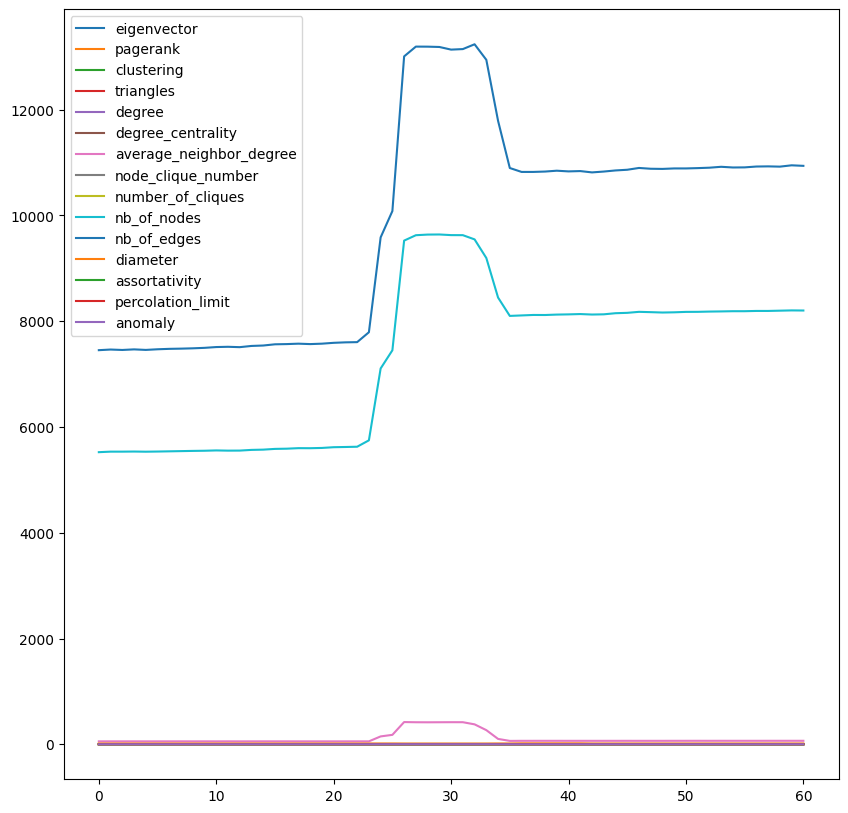

In [89]:
data.plot(figsize=(10,10))

# Hijacking

In [94]:
from BML.data import Dataset
from BML import utils

#################
# Data collection

folder = "dataset/"
dataset = Dataset(folder)

dataset.setParams({
    "PrimingPeriod": 10*60, # 10 hours of priming data
    "IpVersion": [4], # only IPv4 routes
    "Collectors": ["rrc06"], # rrc06: at Otemachi, Japan 
})

dataset.setPeriodsOfInterests([
    {
    "name": "BalancerHijack",
    "label": "hijack",
    "start_time": utils.getTimestamp(2023, 9, 20, 4, 0, 0),  # August 25, 2017, 3:00 UTC
    "end_time": utils.getTimestamp(2023, 9, 20, 7, 0, 0)  # August 25, 2017, 4:00 UTC
    }
])


# run the data collection
utils.runJobs(dataset.getJobs(), folder+"collect_jobs") 


################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/collect_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 7m 39s


In [95]:
# graph features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "HijackAnalyze")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 2
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/transform_jobs/queue.log


  0%|          | 0/2 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 7s


In [96]:
import pandas as pd 
data = pd.read_json(folder+"/hijack/BalancerHijack/transform/HijackAnalyze/HijackAnalyze_1.json")
data

,prefix_origin,prefix_path,subprefix_origin,subprefix_path


In [99]:
# graph features extraction every minute
datTran = DatasetTransformation(folder, "BML.transform", "Features")

datTran.setParams({
        "global":{
            "Period": 1,
        }
    })

# run the data transformation
utils.runJobs(datTran.getJobs(), folder+"transform_jobs") 

################
# Run jobs list 
################
Number of processes to execute: 2
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/transform_jobs/queue.log


  0%|          | 0/2 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 5s


<Axes: >

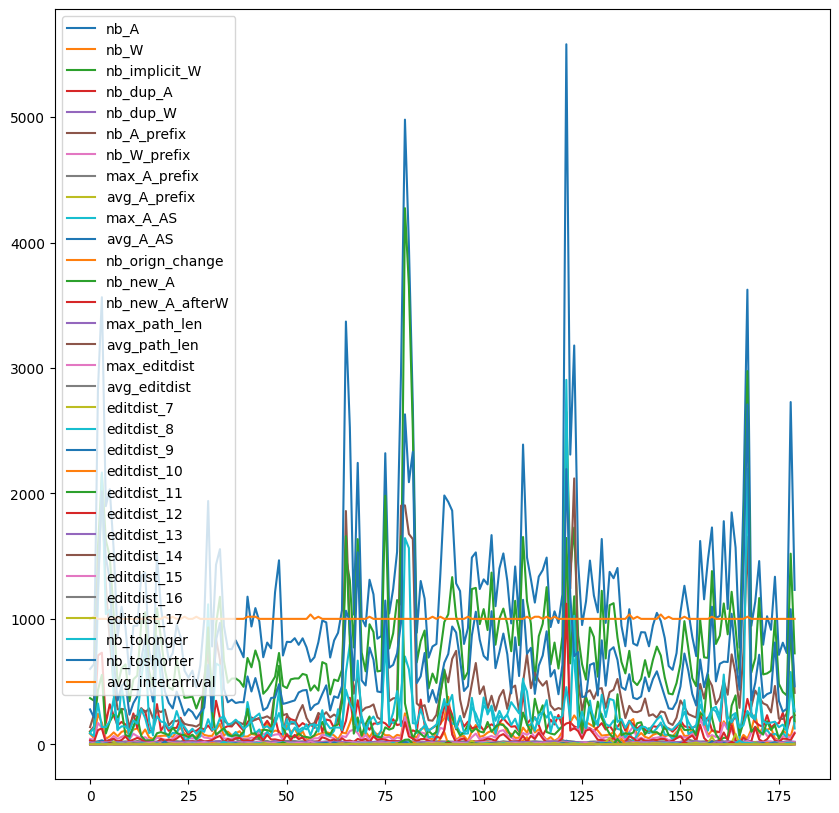

In [102]:
import pandas as pd 
data = pd.read_json(folder+"/hijack/BalancerHijack/transform/Features/Features_1.json")
data.plot(figsize=(10,10))

# Custom data transformation

In [18]:
from BML.transform import DatasetTransformation
import os
import random

# Initialize the DatasetTransformation for hijack analysis
datTran = DatasetTransformation(folder, "BML.transform", "HijackLabel")

# Set transformation parameters (if any specific parameters are required for hijackAnalyze.py)
datTran.setParams({
    "global": {
        "Period": 1,  # Example parameter, modify as needed for hijackAnalyze.py
    }
})

# Run the data transformation
utils.runJobs(datTran.getJobs(), folder + "transform_jobs")

################
# Run jobs list 
################
Number of processes to execute: 1
Number of processes in parallel: 1
Processing queue: started
To monitor the execution run: watch -n 1 cat dataset/transform_jobs/queue.log


  0%|          | 0/1 [00:00<?, ?it/s]

Processing queue: finish
Computation time: 0h 0m 4s


<Axes: >

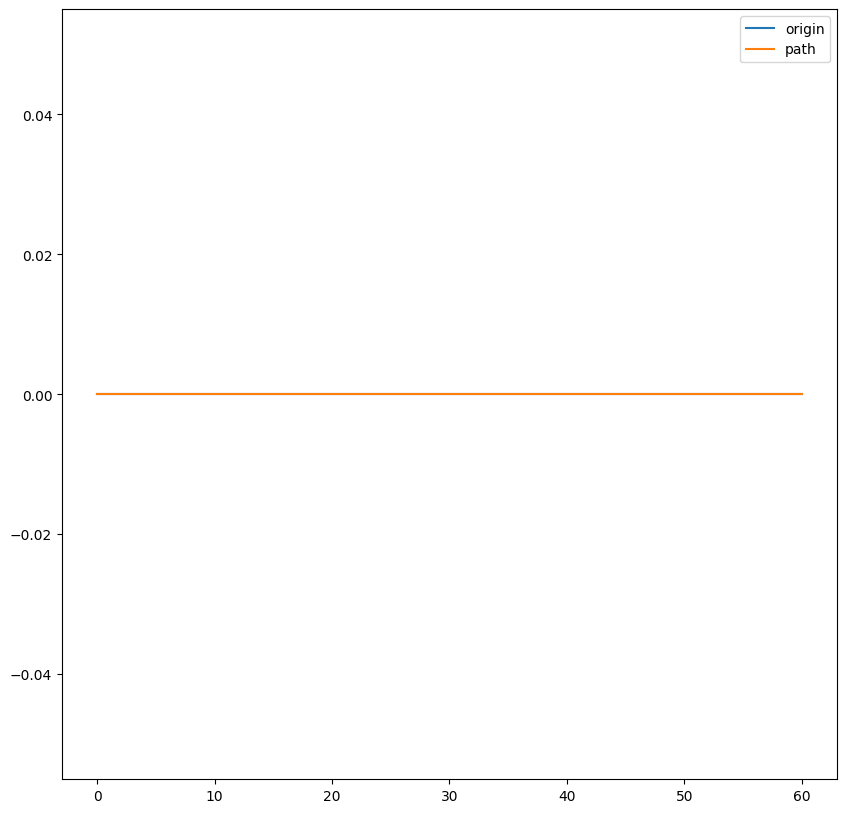

In [20]:
import pandas as pd 
data = pd.read_json(folder+"/anomaly/GoogleLeak/transform/HijackLabel/HijackLabel_1.json")
data.plot(figsize=(10,10))